In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
data=pd.read_csv('heart.csv')
df=pd.DataFrame(data)
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [5]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [6]:
check(df)

column   dtypes  nunique  sum_null
0        age    int64       41         0
1        sex    int64        2         0
2         cp    int64        4         0
3     trtbps    int64       49         0
4       chol    int64      152         0
5        fbs    int64        2         0
6    restecg    int64        3         0
7   thalachh    int64       91         0
8       exng    int64        2         0
9    oldpeak  float64       40         0
10       slp    int64        3         0
11       caa    int64        5         0
12     thall    int64        4         0
13    output    int64        2         0

In [7]:
# خب به نظر میرسه میسینگ ولیو نداریم... بریم یه نگاه کلی به داده هامون بندازیم ببیین چه بلایی سر این خاک بر سر در بیاریم

## EDA:

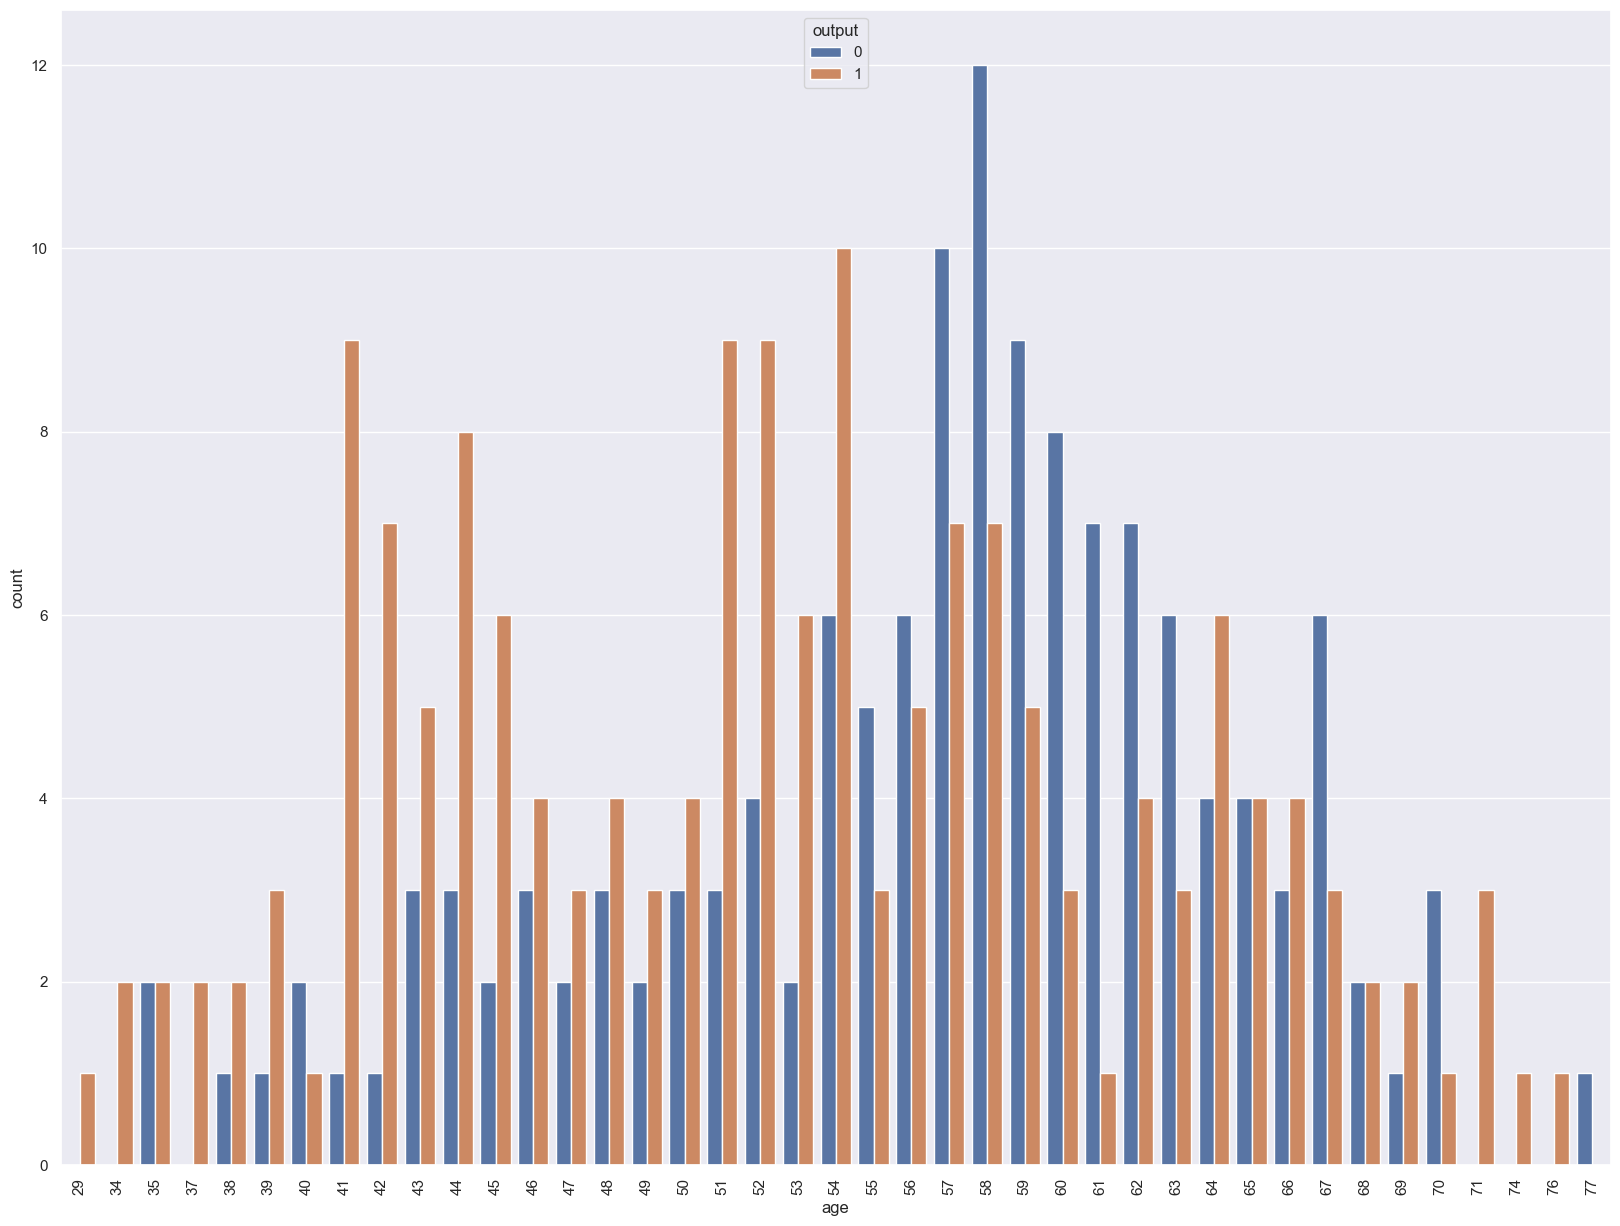

In [11]:
sns.countplot(data=df,x="age",hue='output')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=90)
plt.show()

# کمترین احتمال حمله قلبی با عدد 0 (آبی) و بیشترین احتمال حمله قلبی با عدد 1 (نارنجی) نشون داده شده

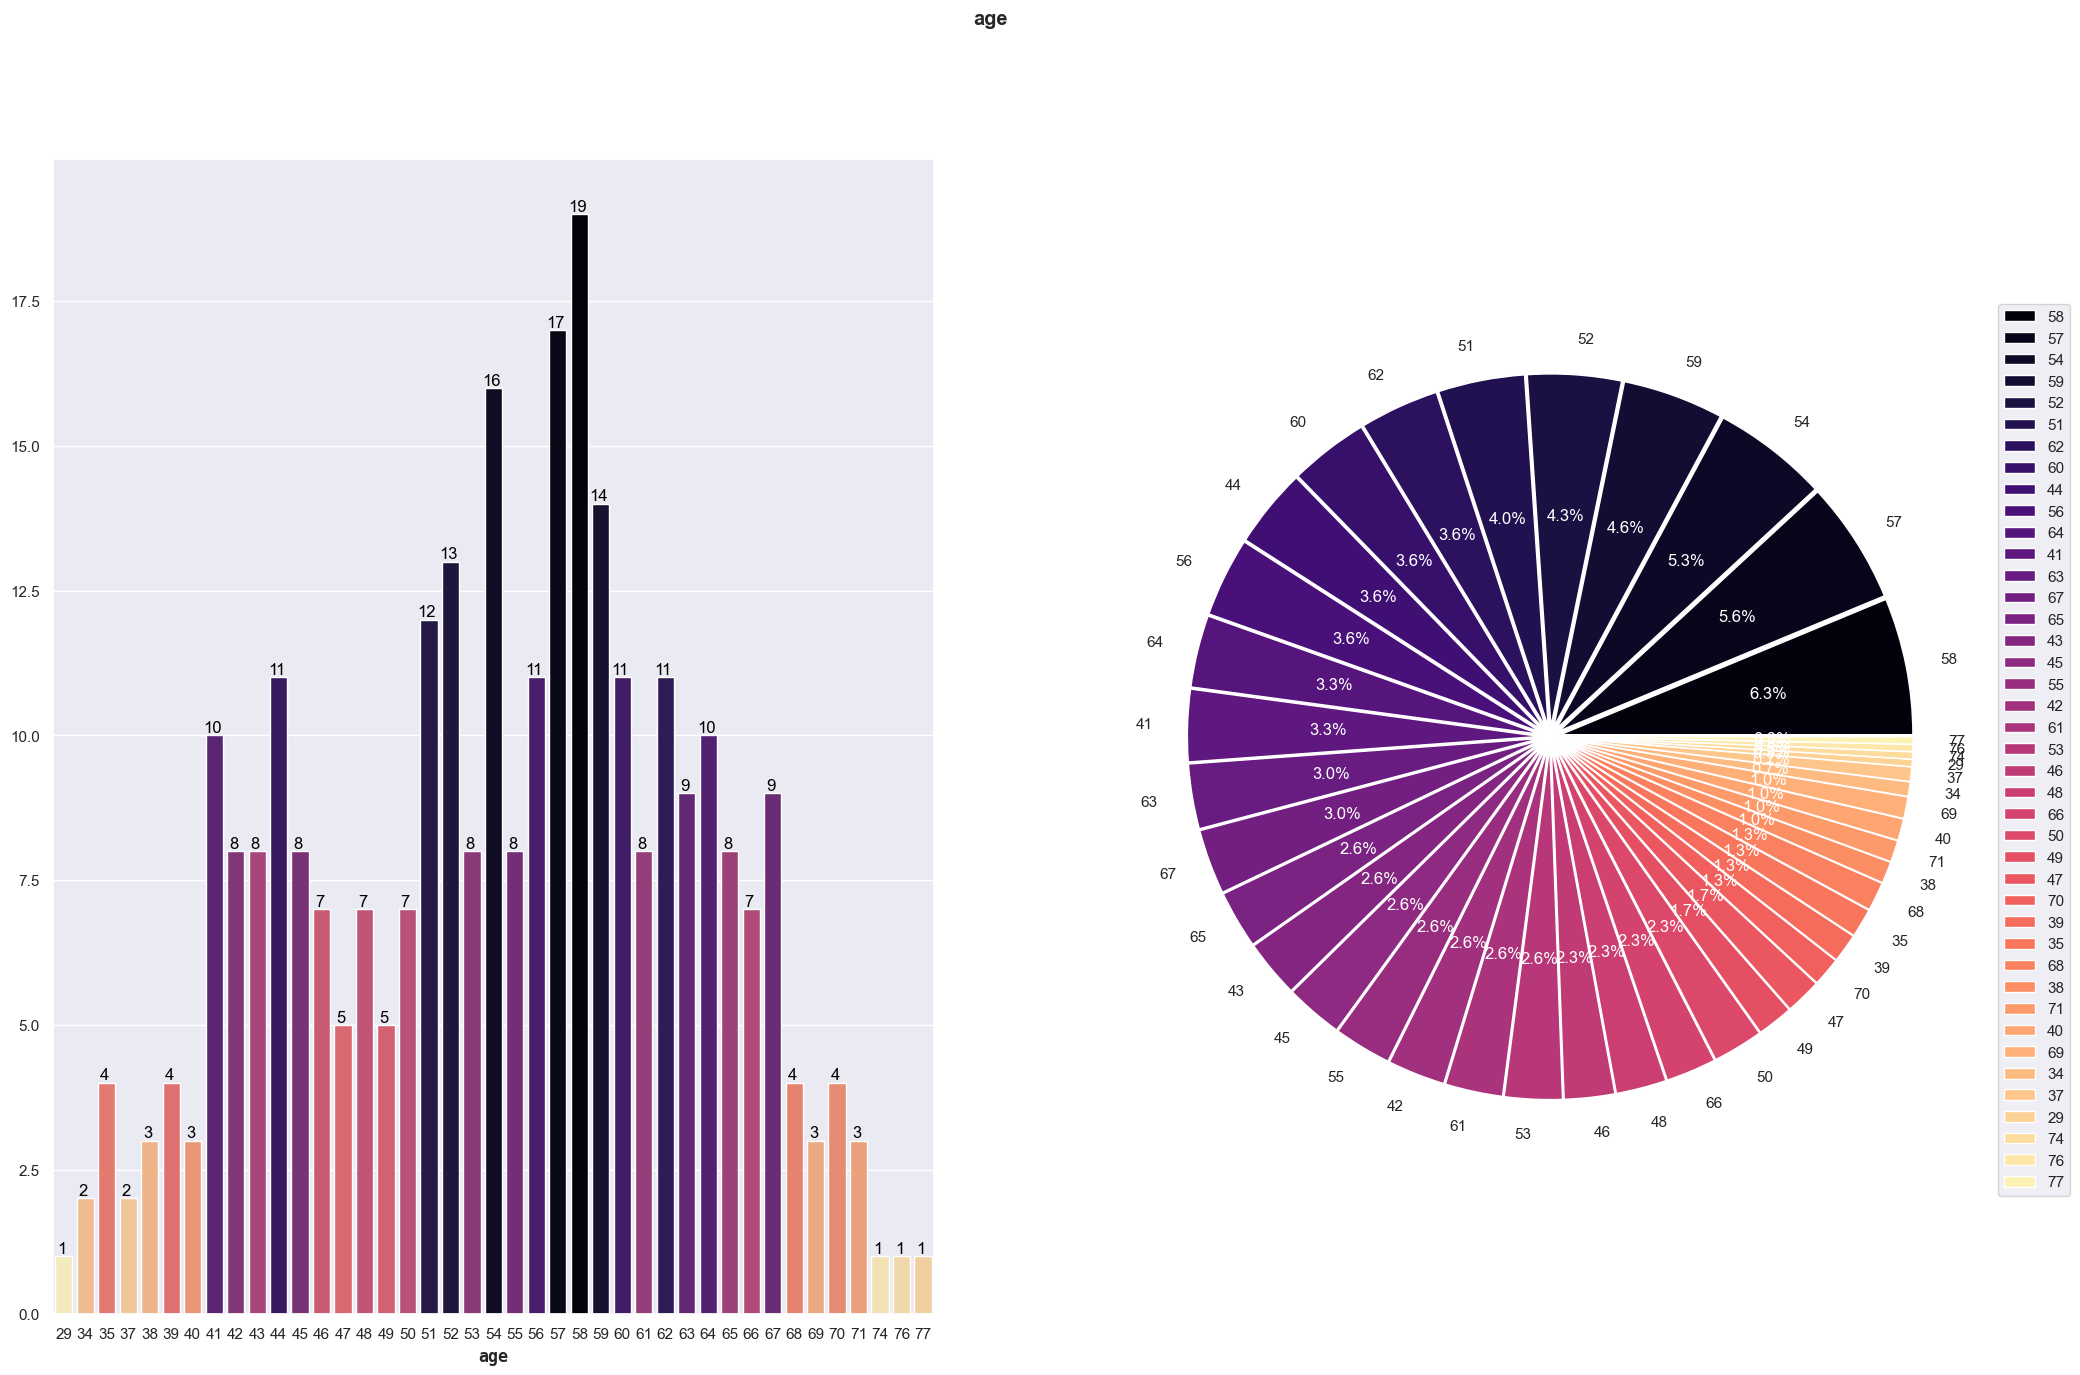

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
x=df['age'].value_counts().index
y=df['age'].value_counts().values.tolist()
data = df.groupby("age").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('age', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['age'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('age',weight = 'bold')
plt.show()

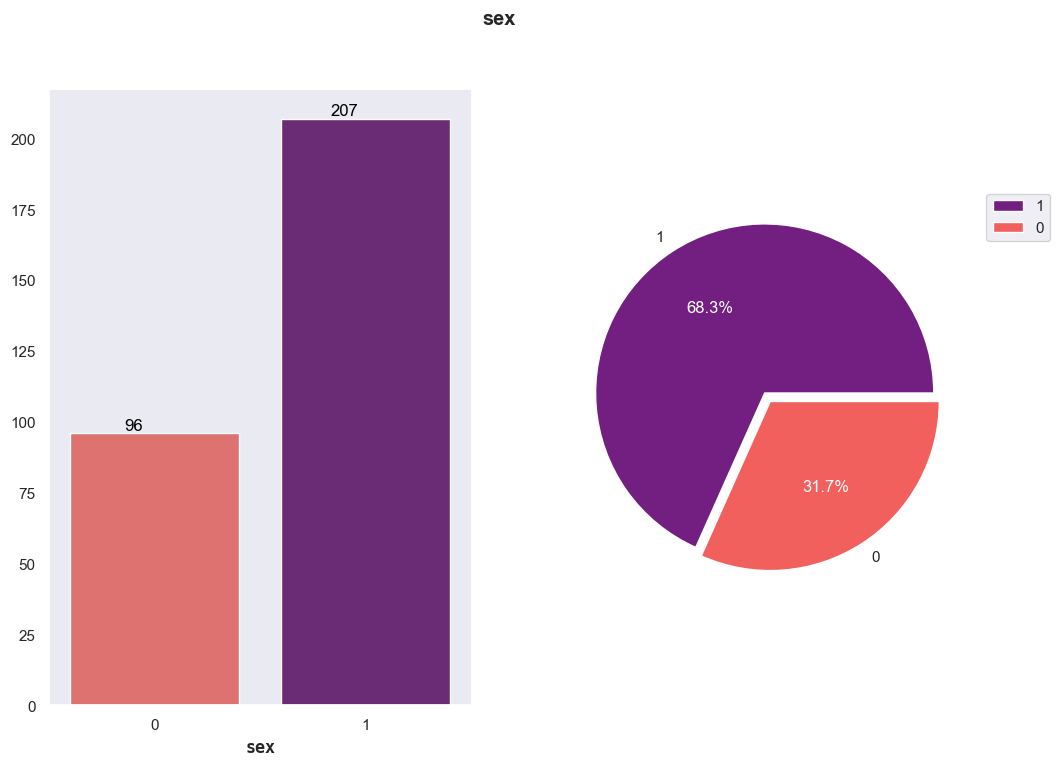

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['sex'].value_counts().index
y=df['sex'].value_counts().values.tolist()
data = df.groupby("sex").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('sex', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['sex'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('sex',weight = 'bold')
plt.show()

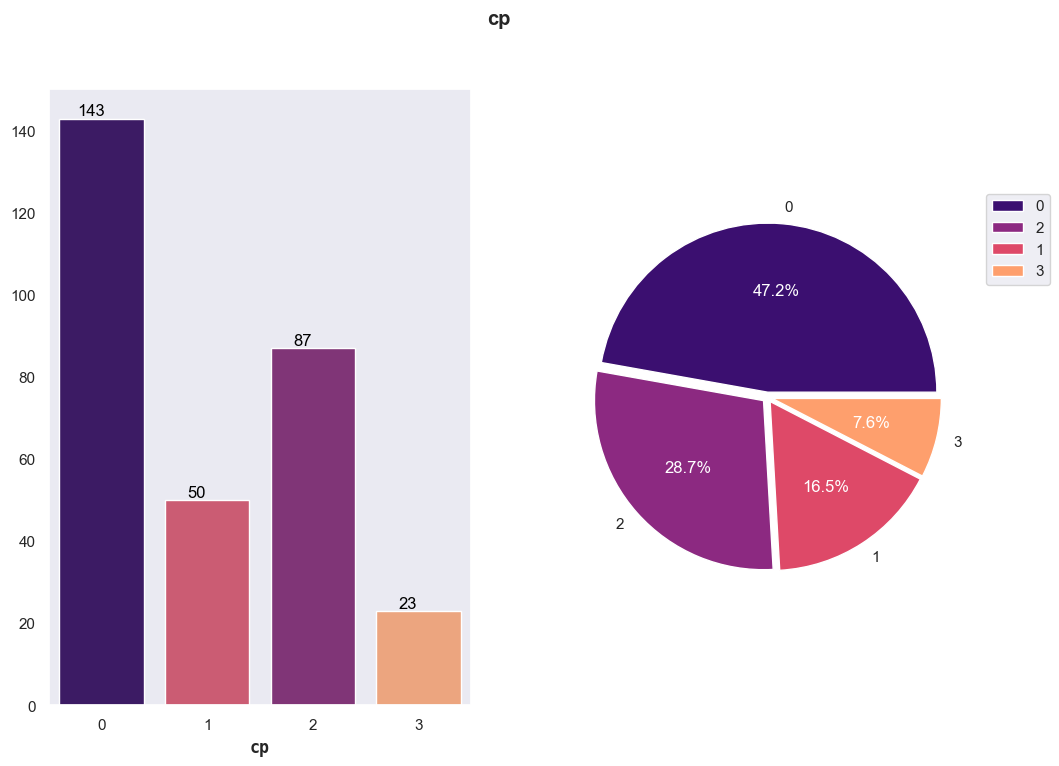

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['cp'].value_counts().index
y=df['cp'].value_counts().values.tolist()
data = df.groupby("cp").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('cp', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['cp'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('cp',weight = 'bold')
plt.show()

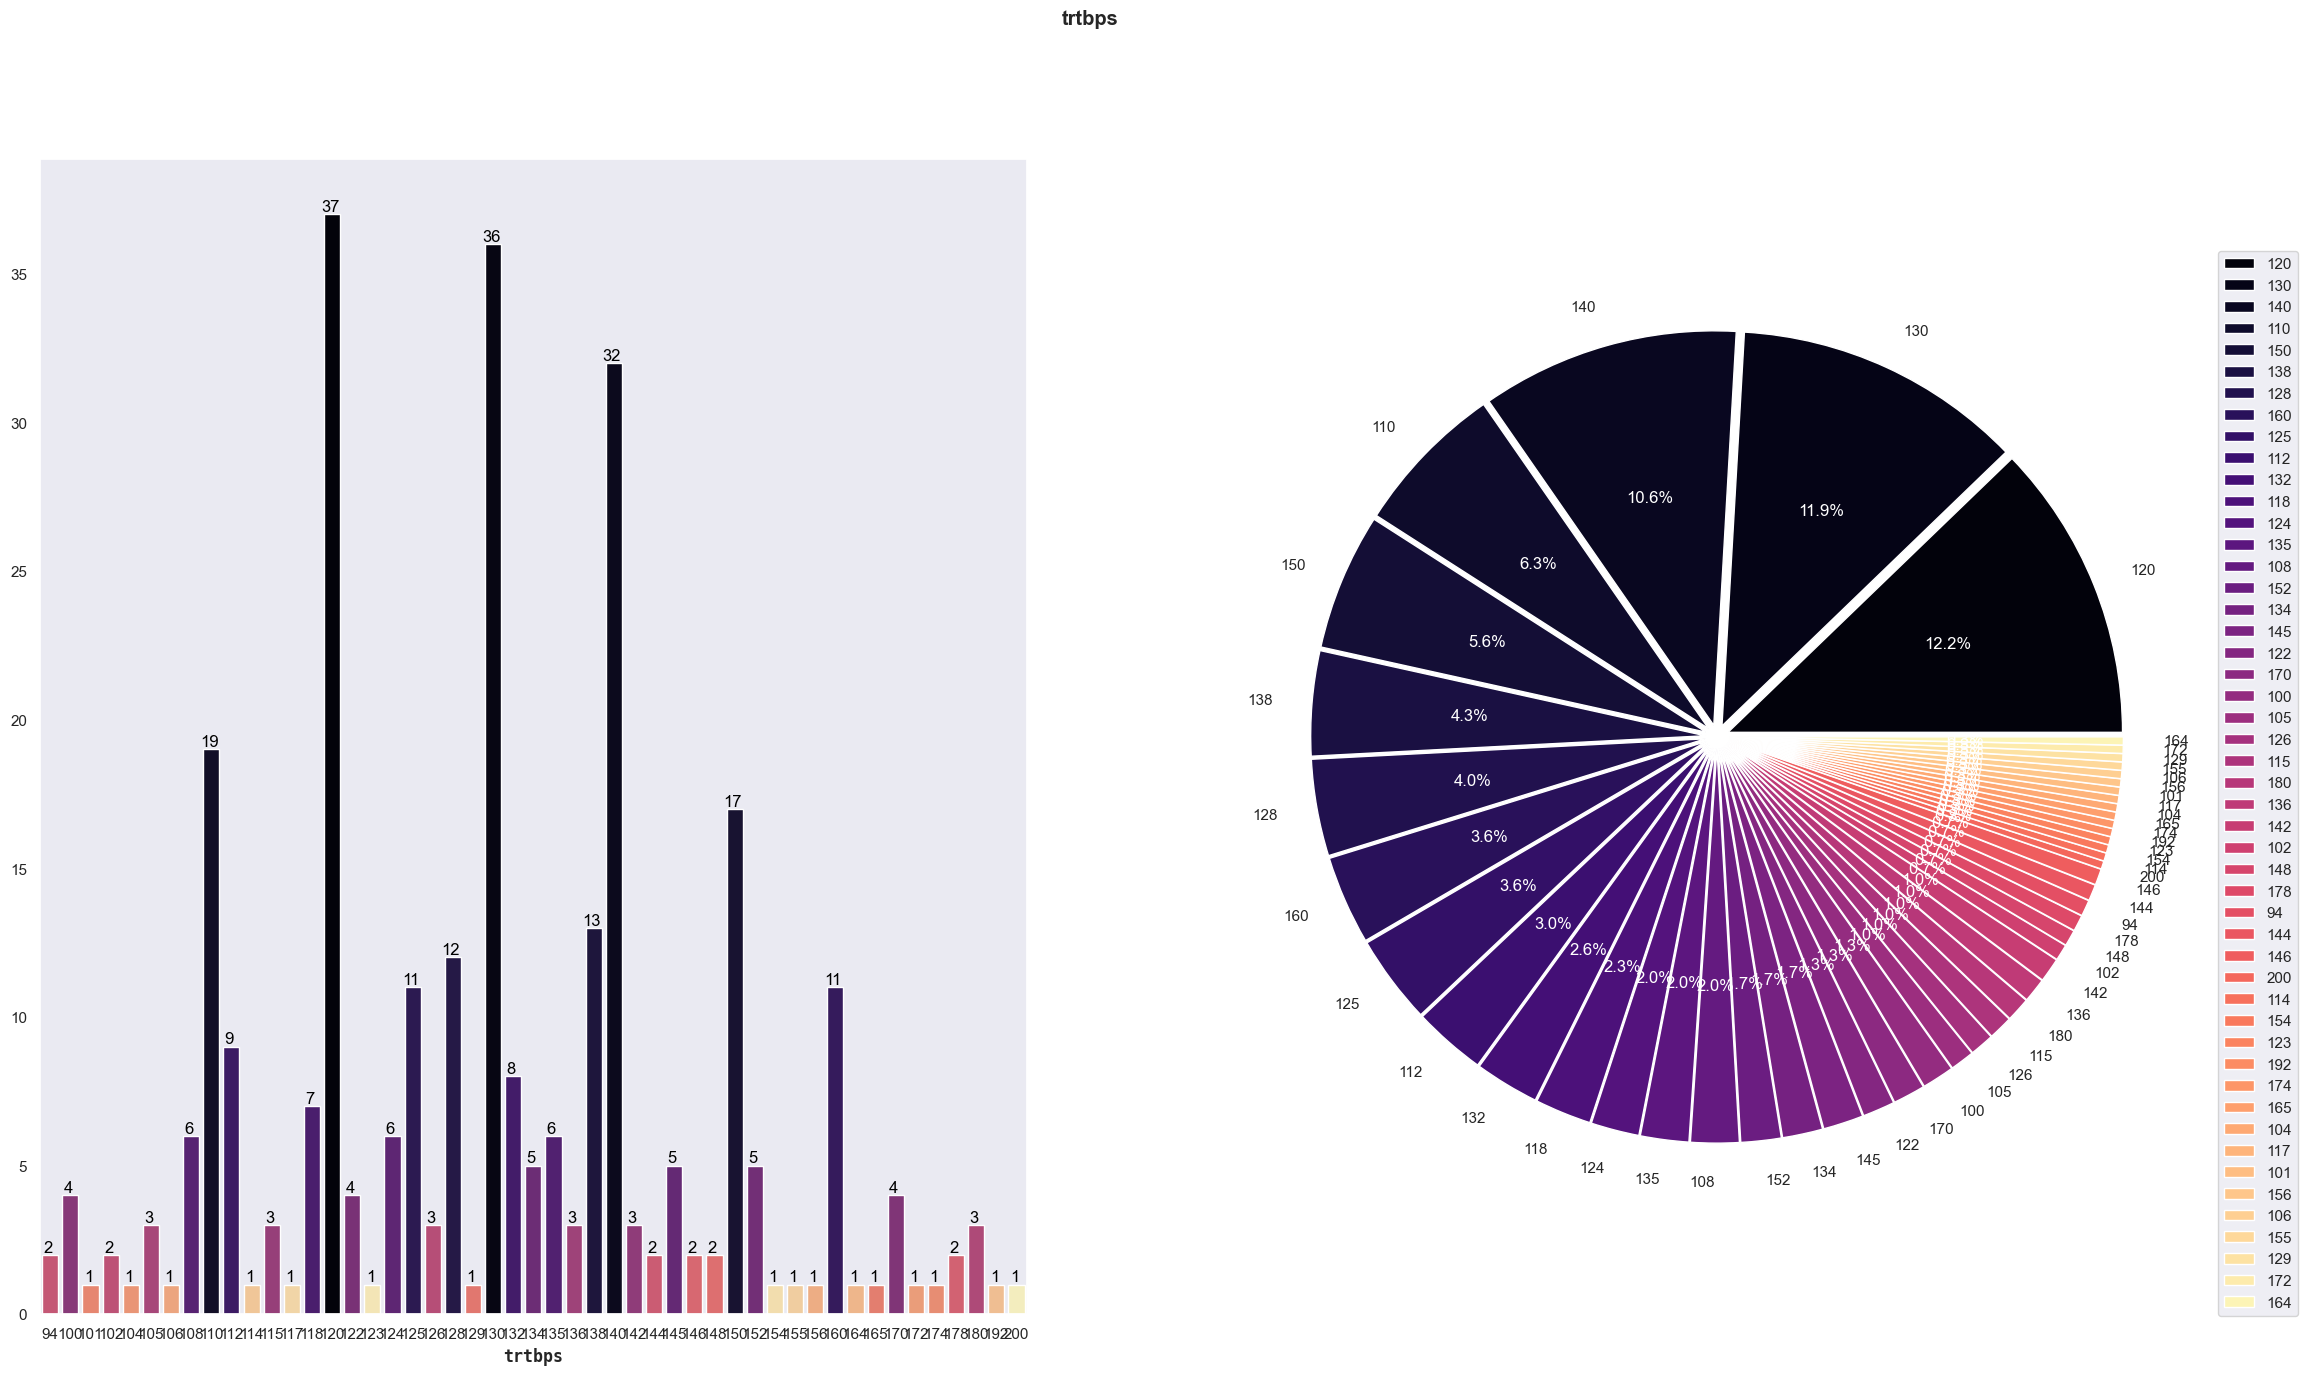

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(28,15))
x=df['trtbps'].value_counts().index
y=df['trtbps'].value_counts().values.tolist()
data = df.groupby("trtbps").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('trtbps', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['trtbps'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('trtbps',weight = 'bold')
plt.show()

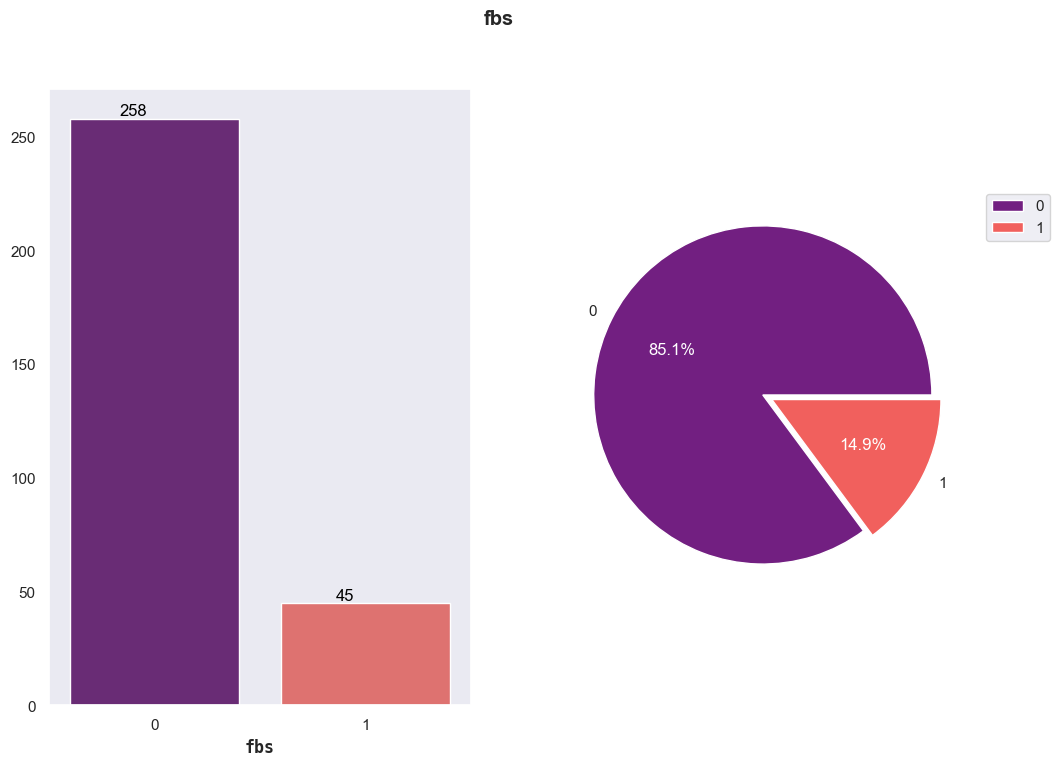

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['fbs'].value_counts().index
y=df['fbs'].value_counts().values.tolist()
data = df.groupby("fbs").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fbs', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['fbs'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fbs',weight = 'bold')
plt.show()

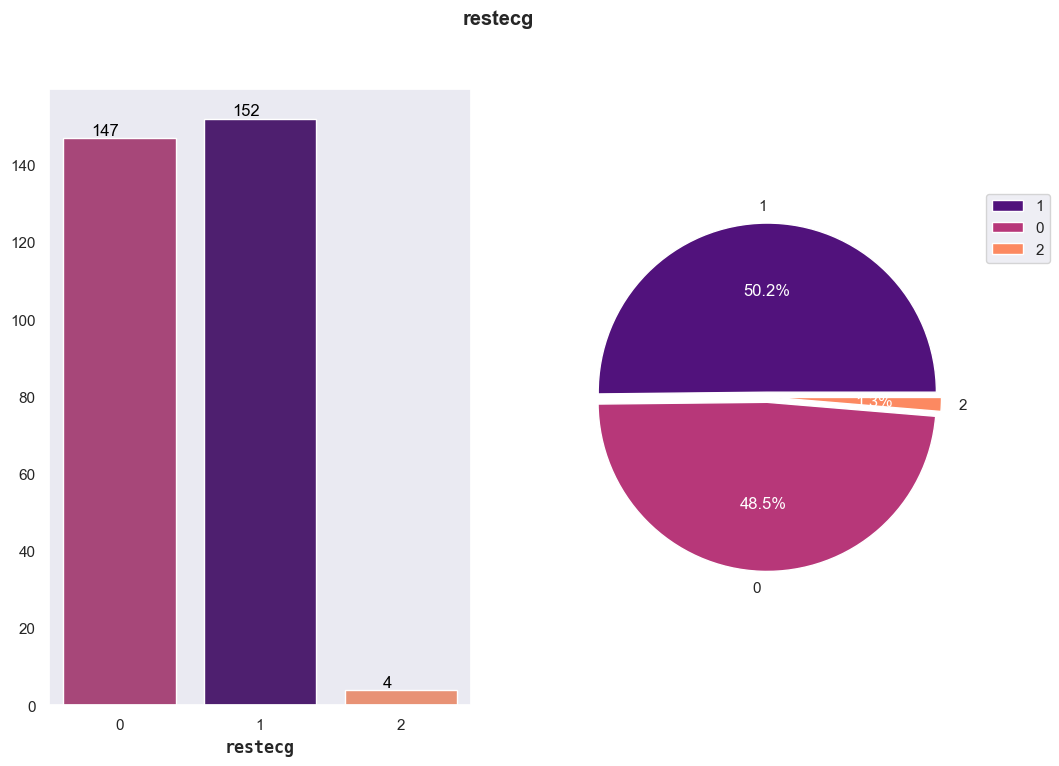

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['restecg'].value_counts().index
y=df['restecg'].value_counts().values.tolist()
data = df.groupby("restecg").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('restecg', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['restecg'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('restecg',weight = 'bold')
plt.show()

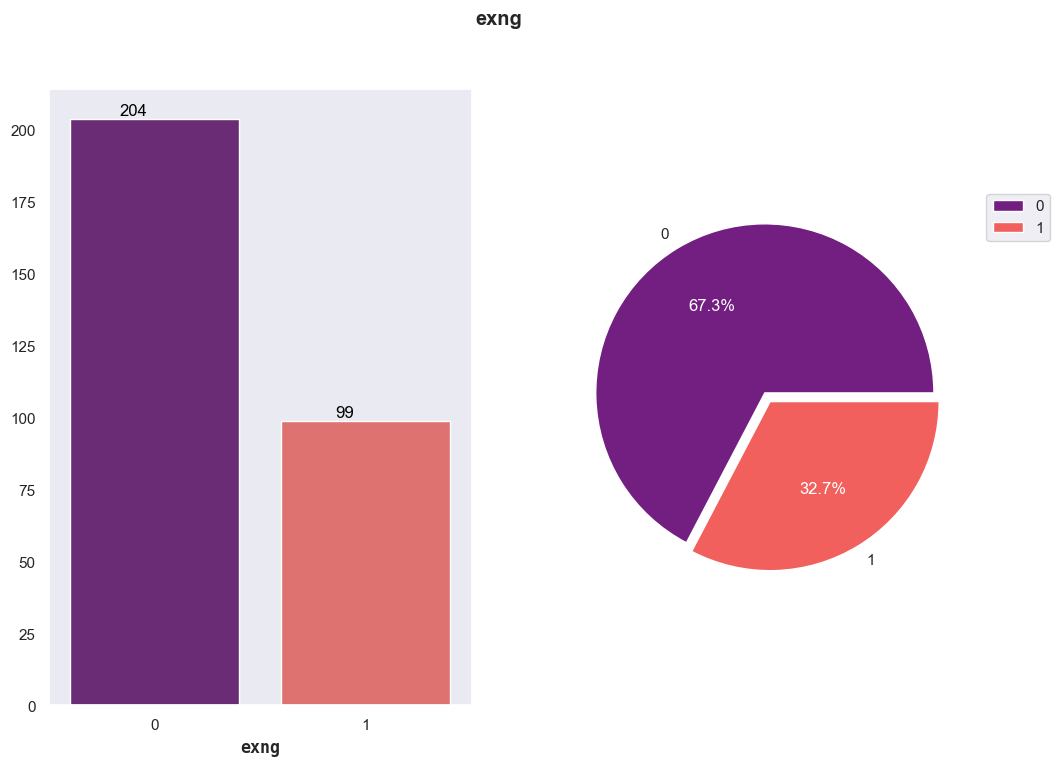

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['exng'].value_counts().index
y=df['exng'].value_counts().values.tolist()
data = df.groupby("exng").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('exng', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['exng'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('exng',weight = 'bold')
plt.show()

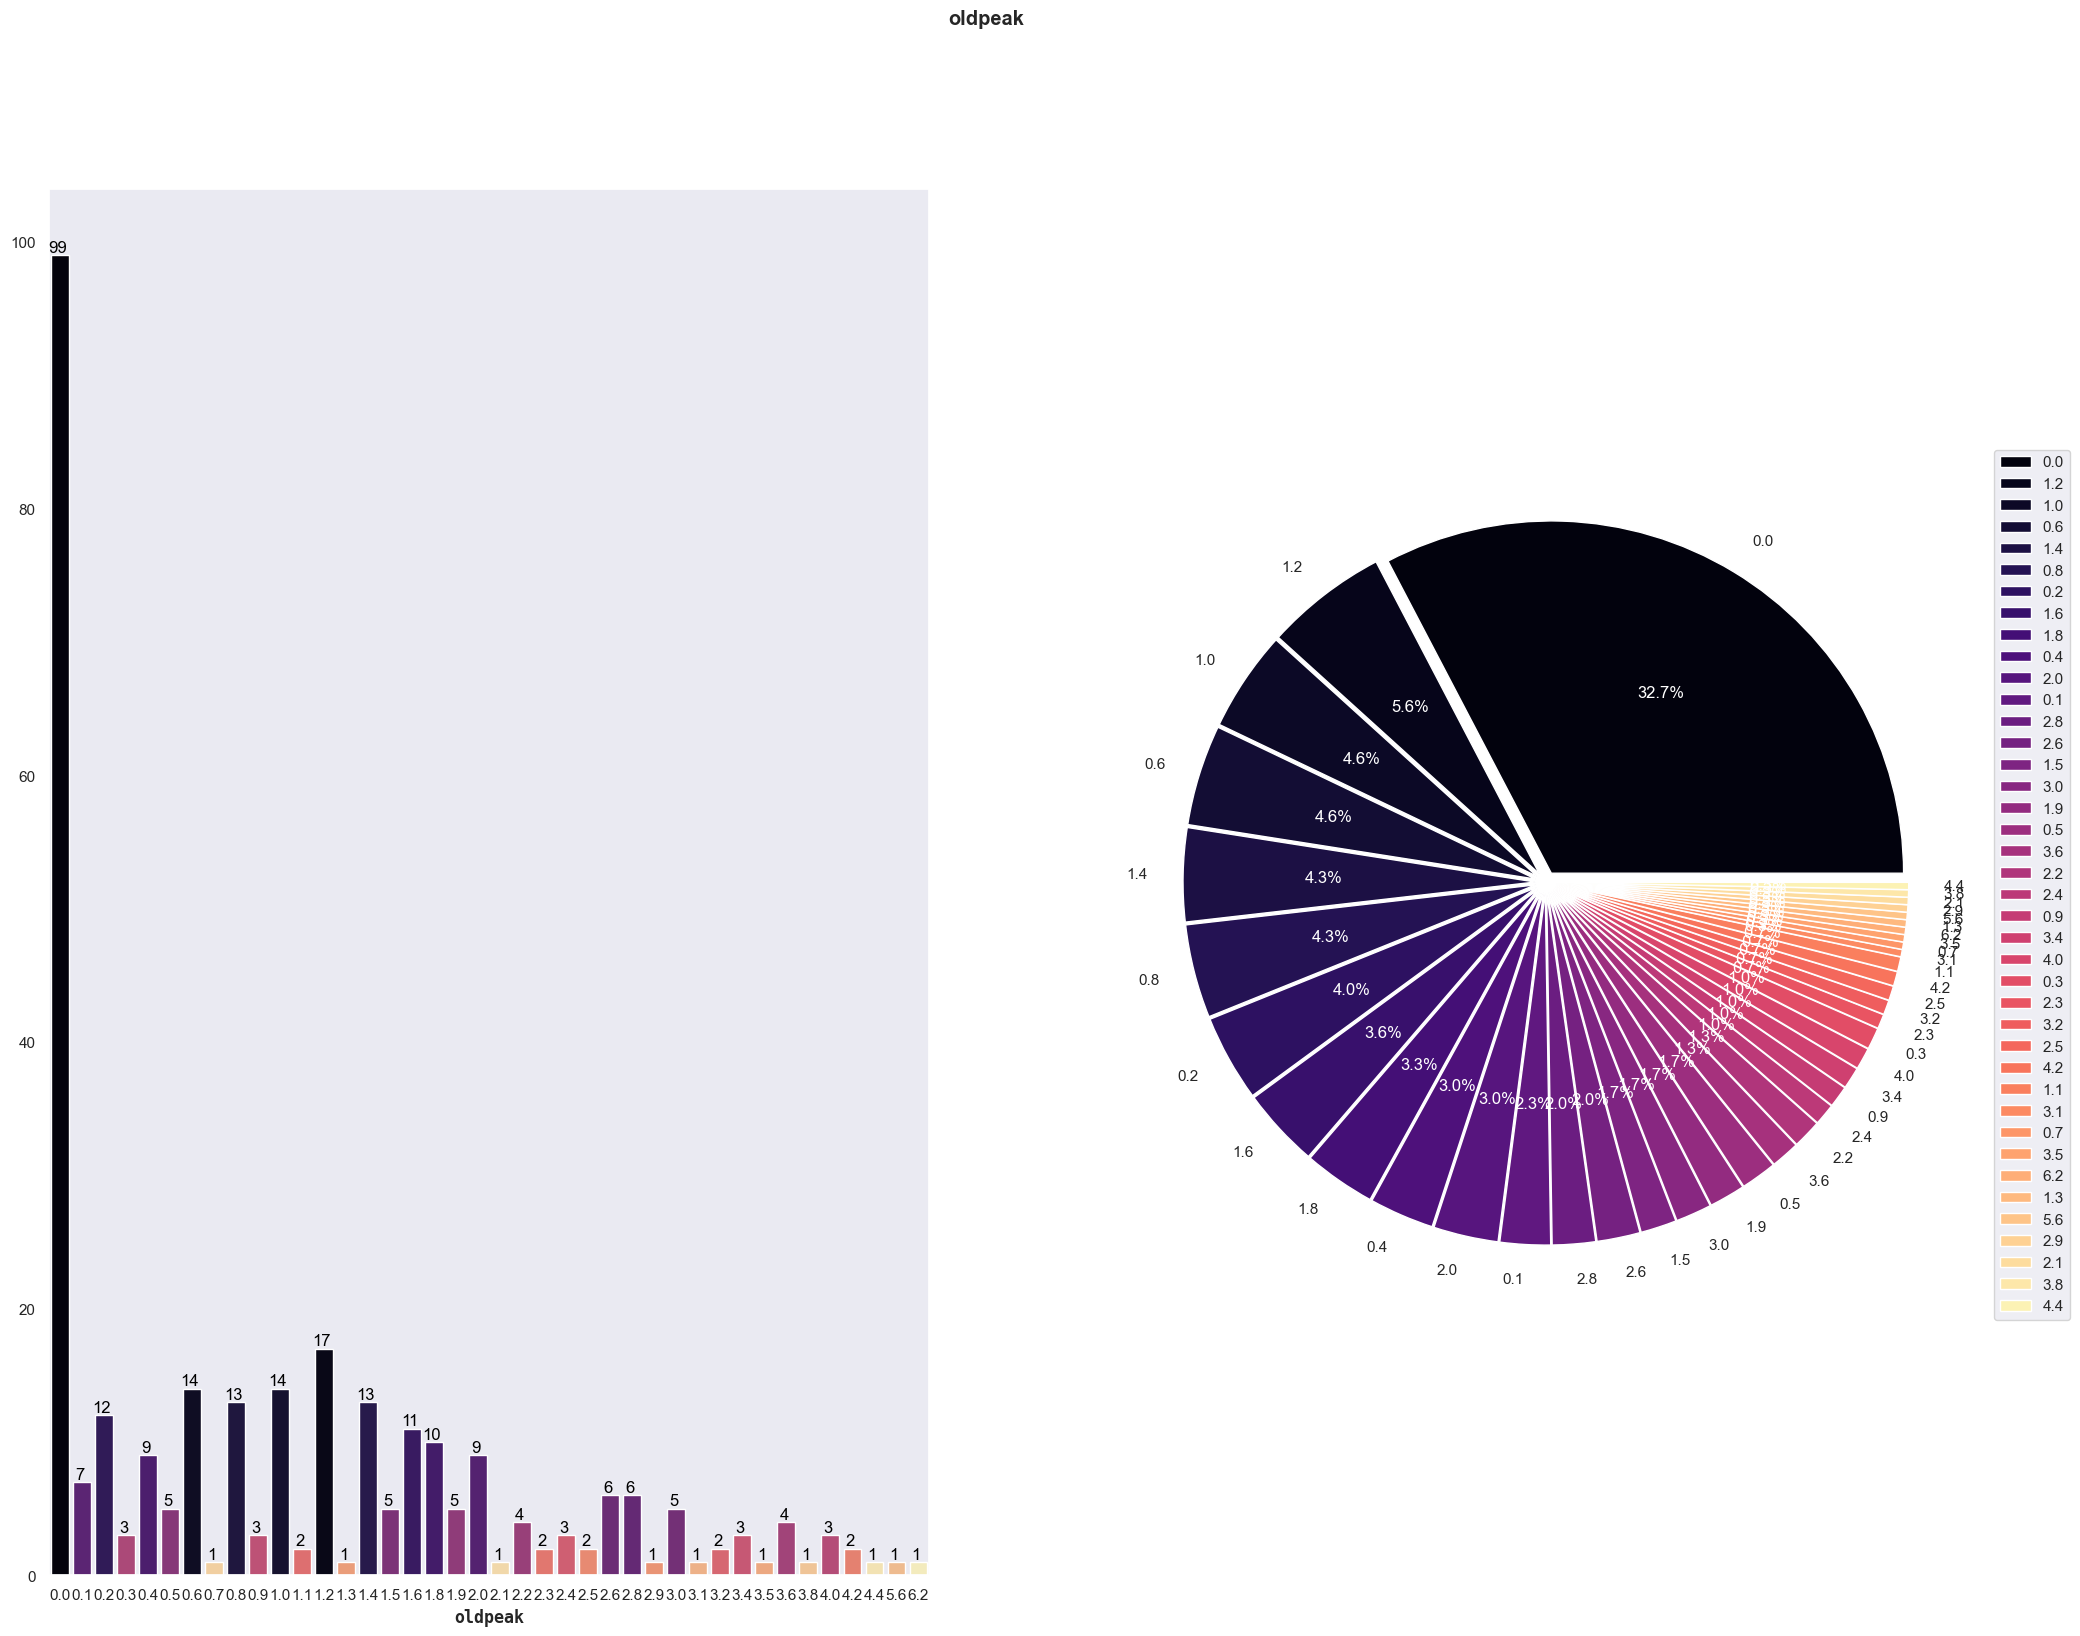

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(25,18))
x=df['oldpeak'].value_counts().index
y=df['oldpeak'].value_counts().values.tolist()
data = df.groupby("oldpeak").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('oldpeak', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['oldpeak'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('oldpeak',weight = 'bold')
plt.show()

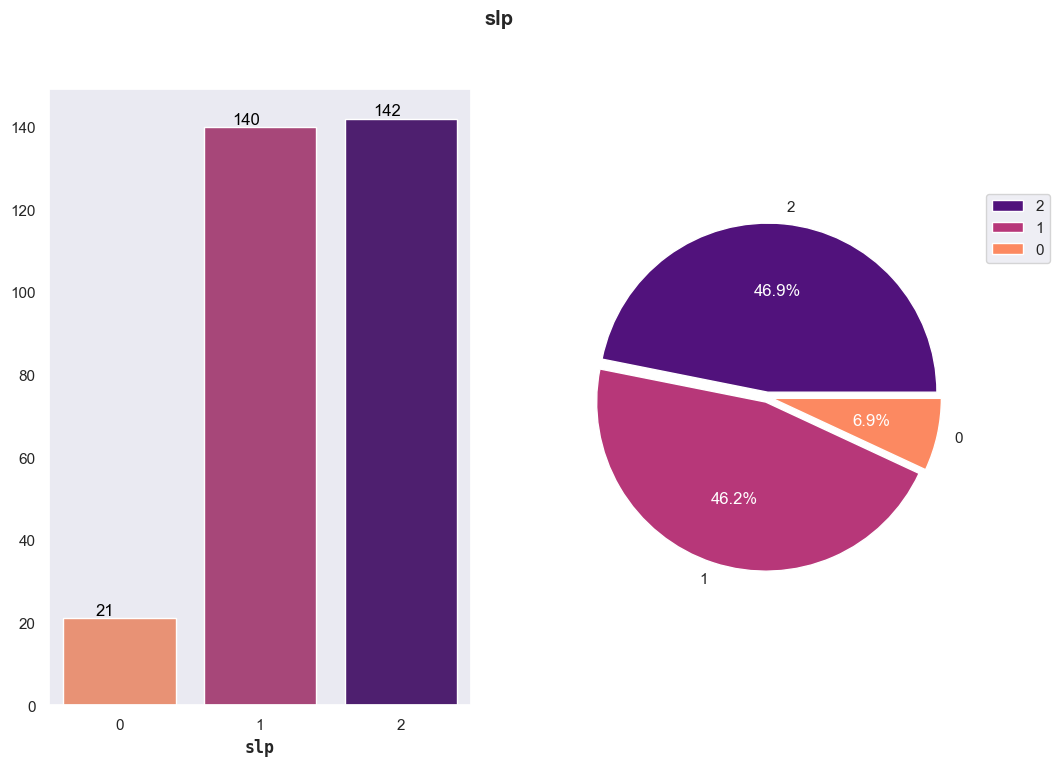

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['slp'].value_counts().index
y=df['slp'].value_counts().values.tolist()
data = df.groupby("slp").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('slp', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['slp'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('slp',weight = 'bold')
plt.show()

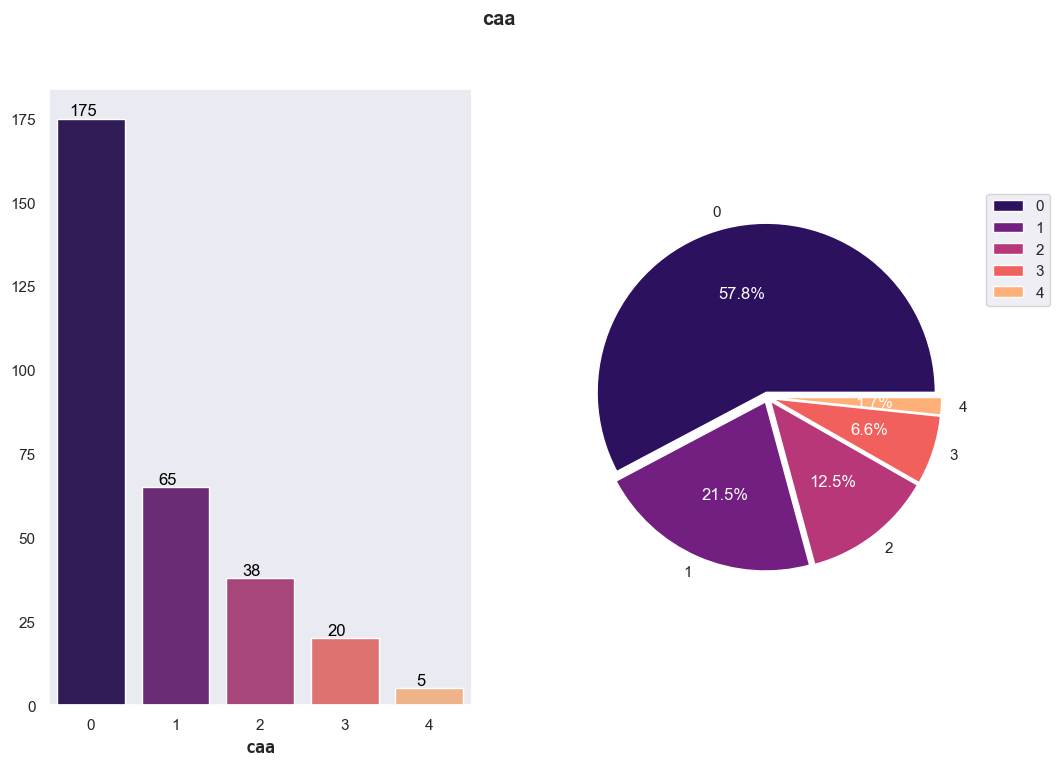

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['caa'].value_counts().index
y=df['caa'].value_counts().values.tolist()
data = df.groupby("caa").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('caa', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['caa'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('caa',weight = 'bold')
plt.show()

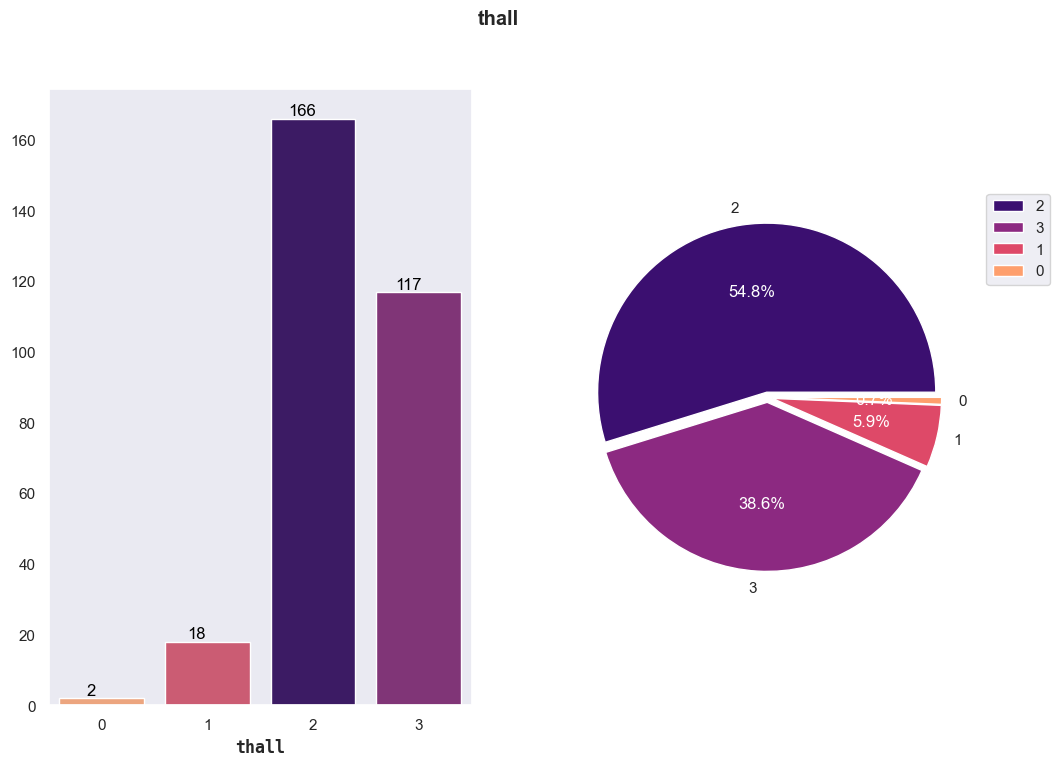

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['thall'].value_counts().index
y=df['thall'].value_counts().values.tolist()
data = df.groupby("thall").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('thall', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['thall'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('thall',weight = 'bold')
plt.show()

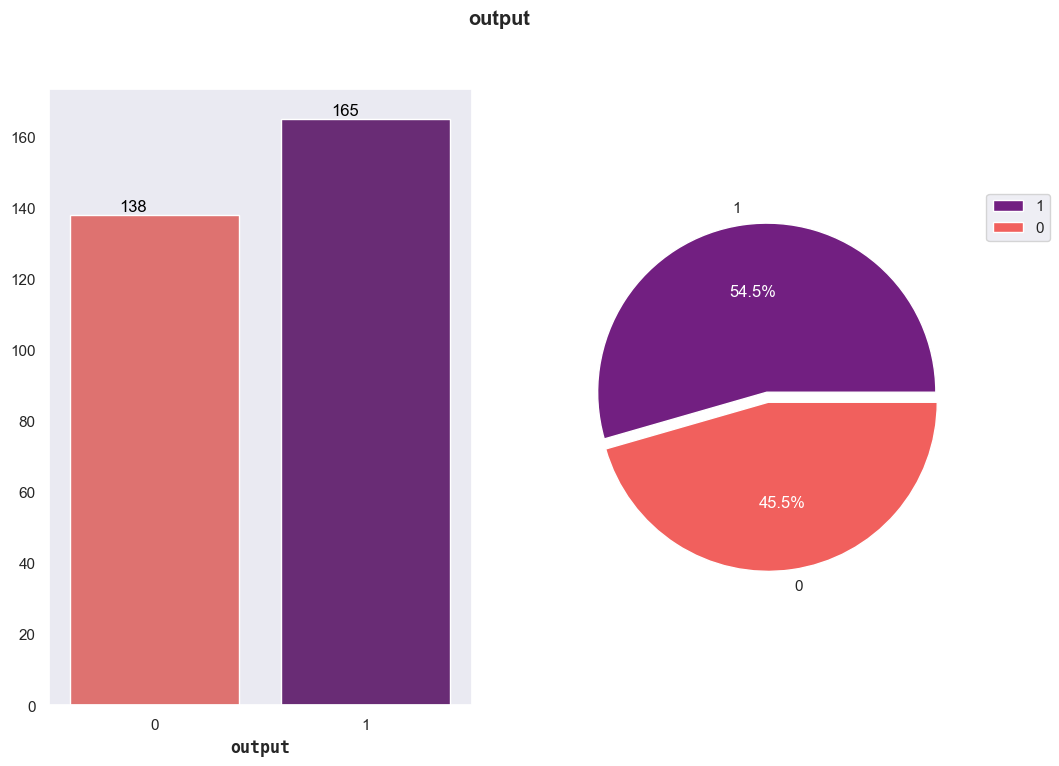

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
x=df['output'].value_counts().index
y=df['output'].value_counts().values.tolist()
data = df.groupby("output").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('output', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['output'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('output',weight = 'bold')
plt.show()

In [37]:
def diagnostic_plots(df, variable,target):
    # این فانکشن میاد و هر فیچر رو با تارگتی که تعریف میکنیم مقایسش میکنه و توی چهارتا پلات متفاوت زیر رسم میکنه

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

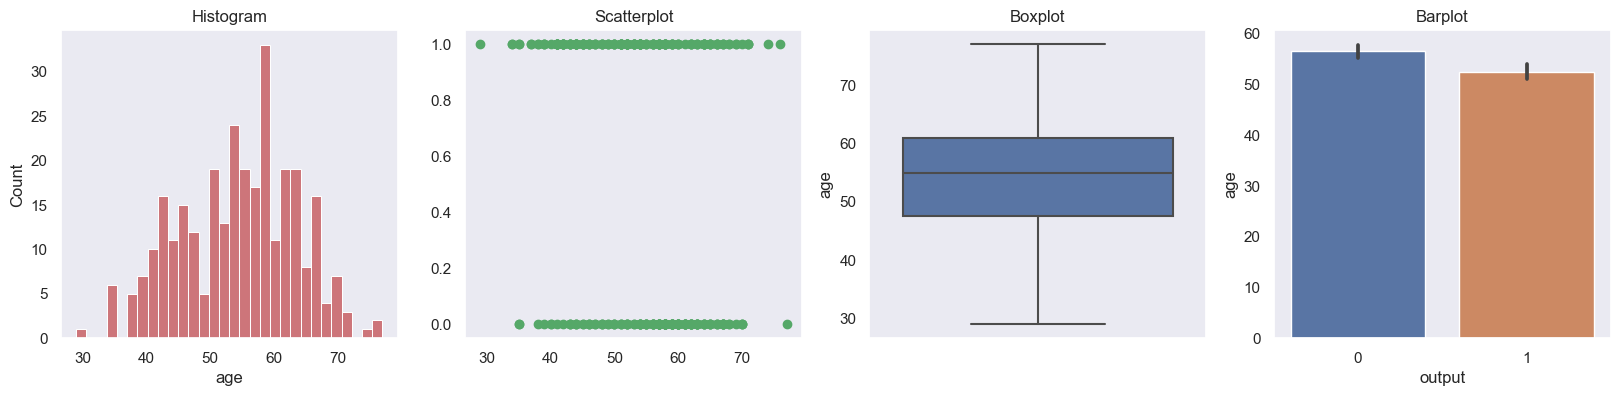

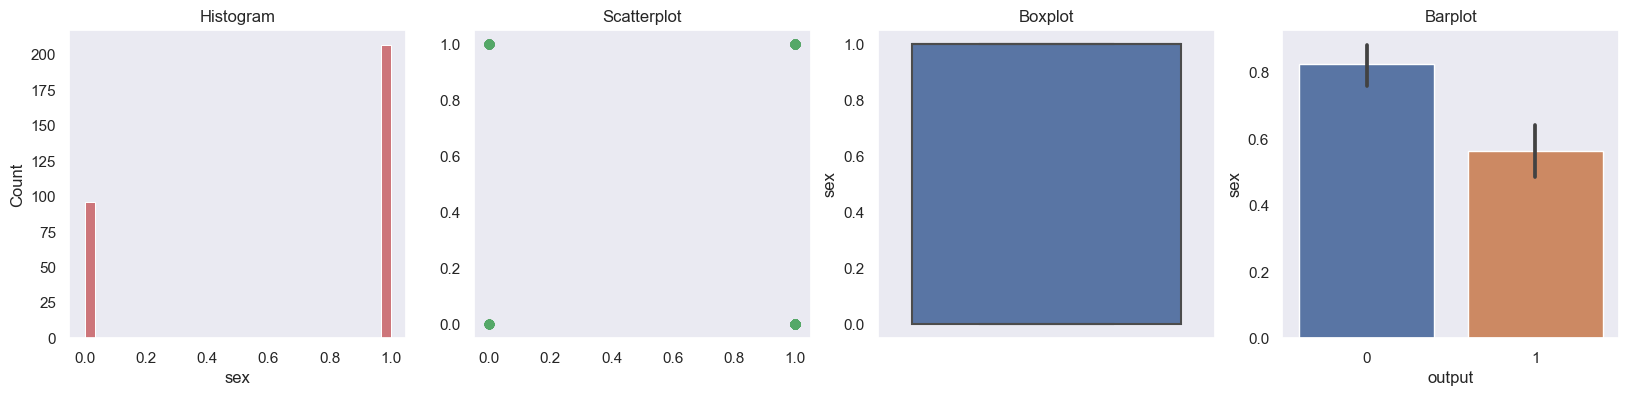

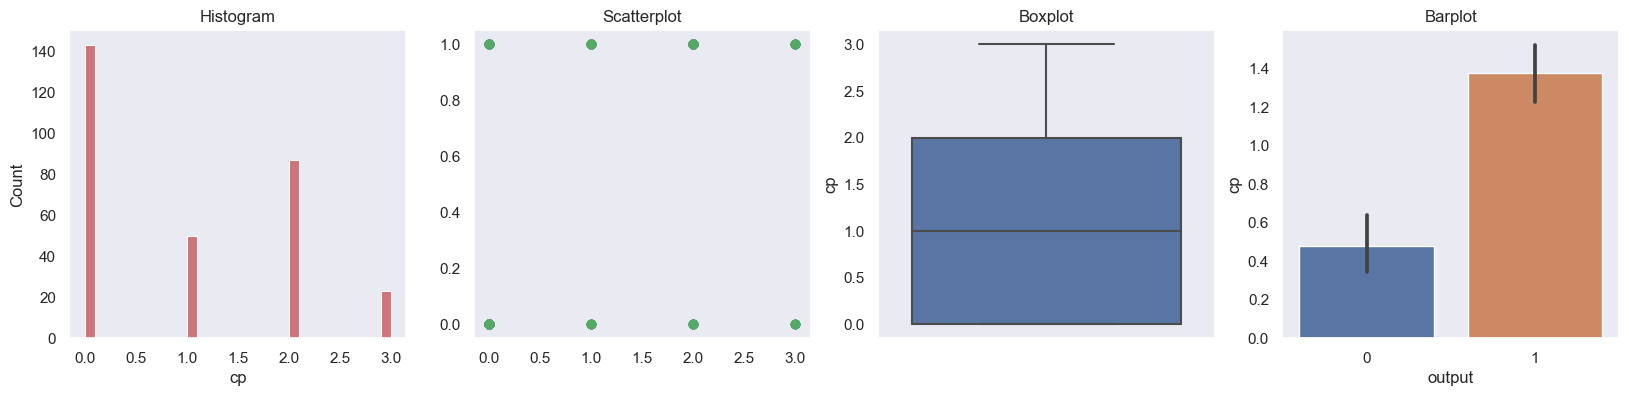

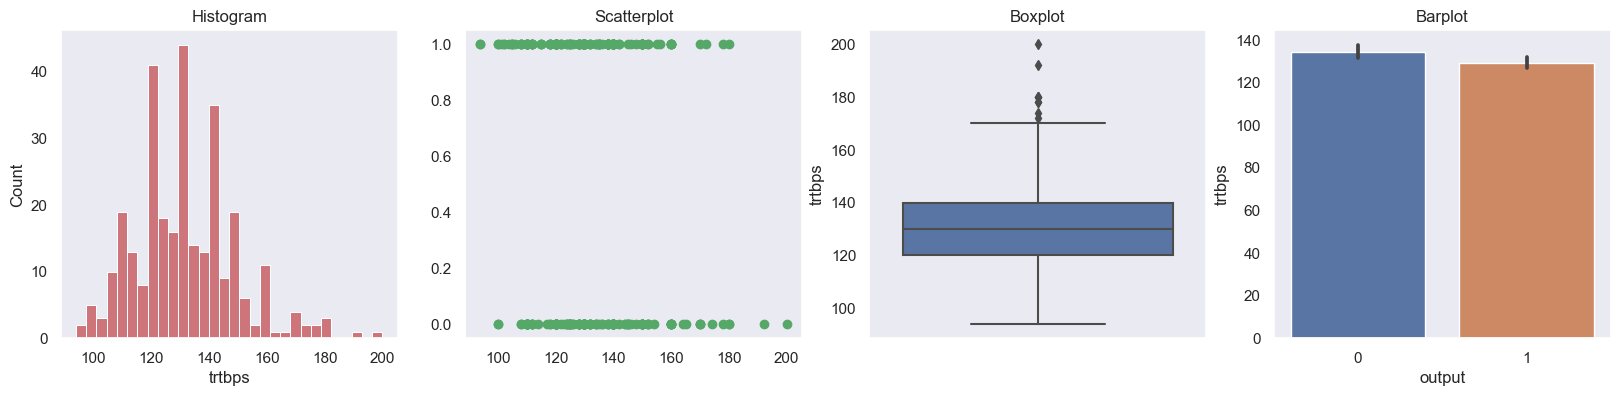

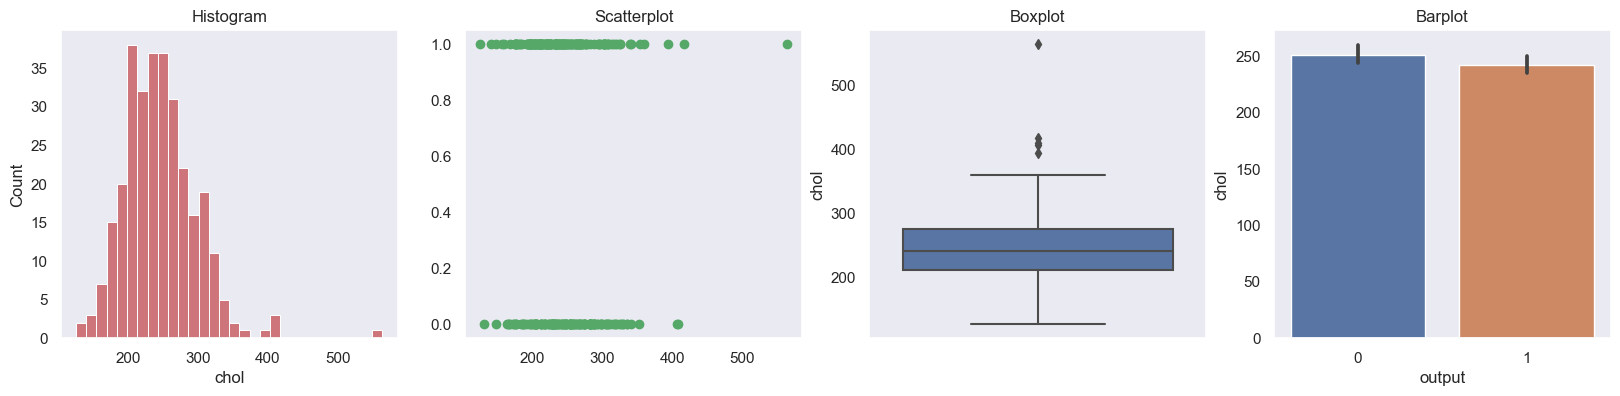

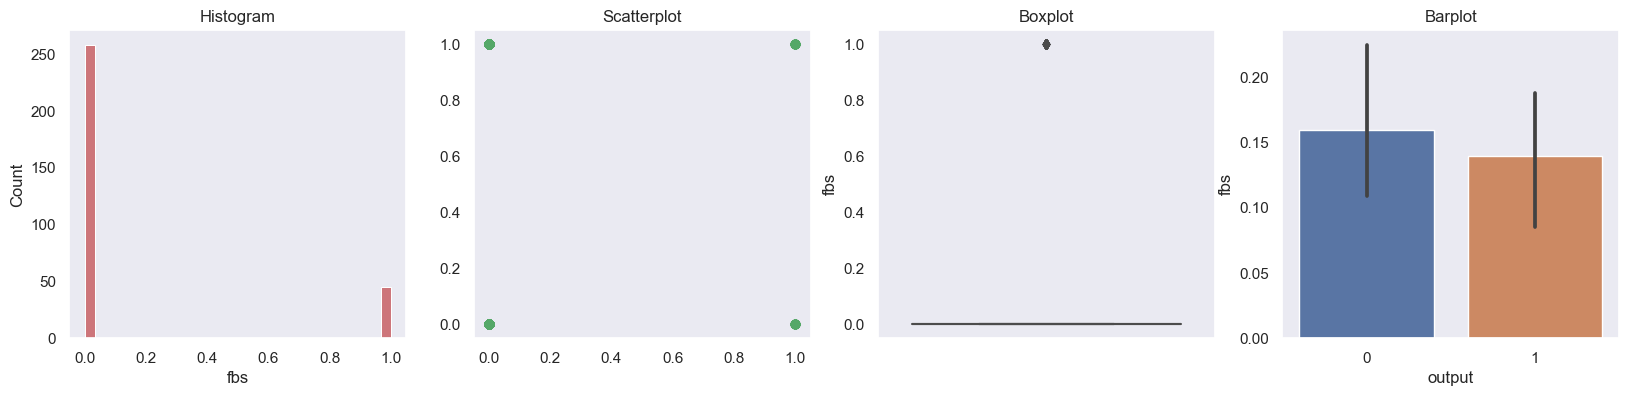

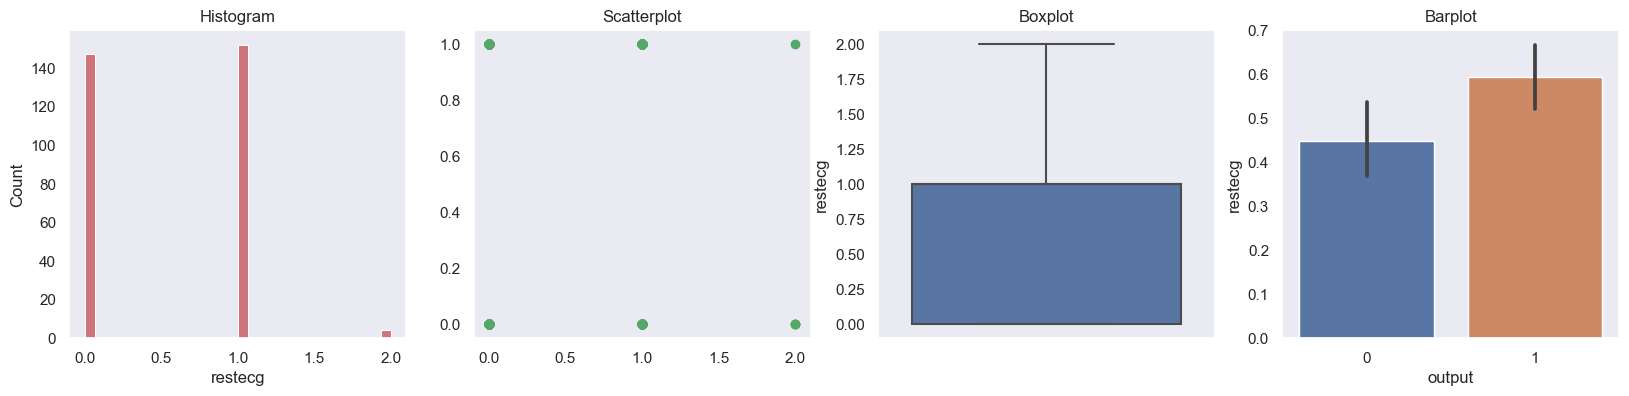

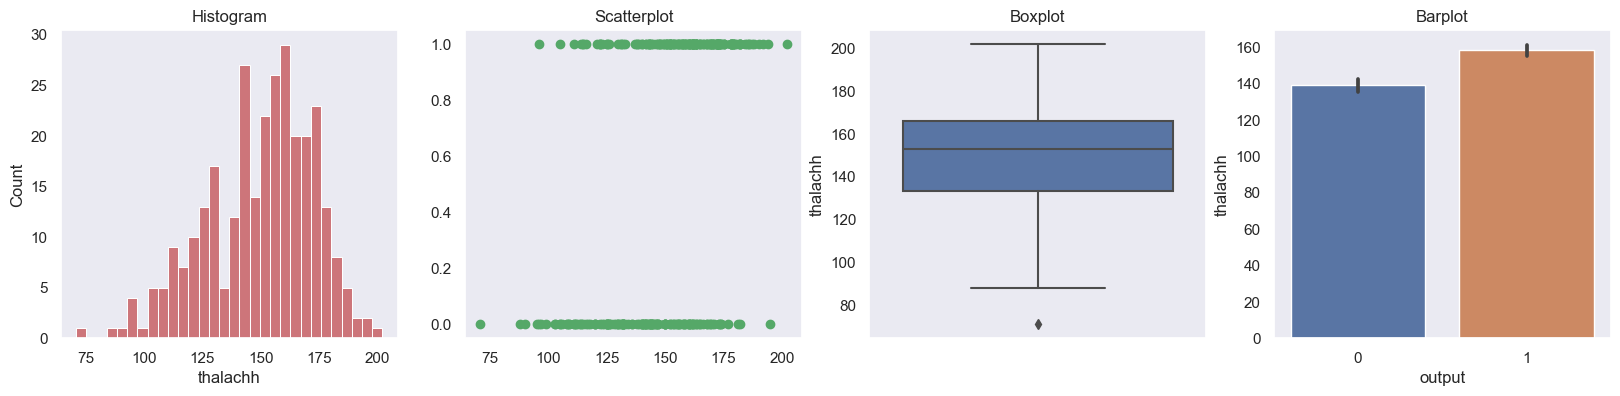

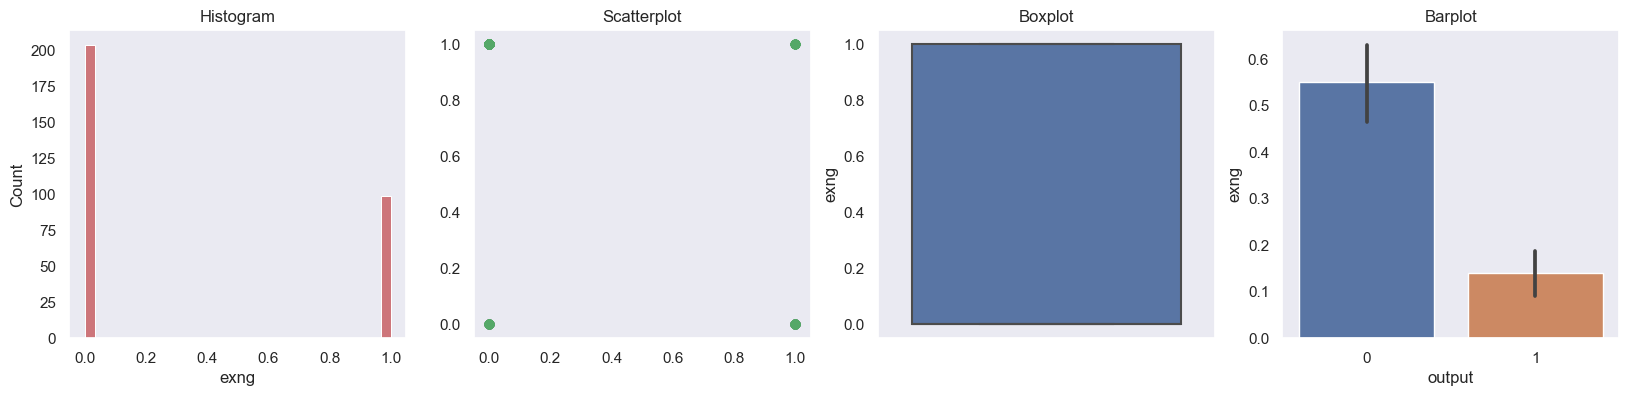

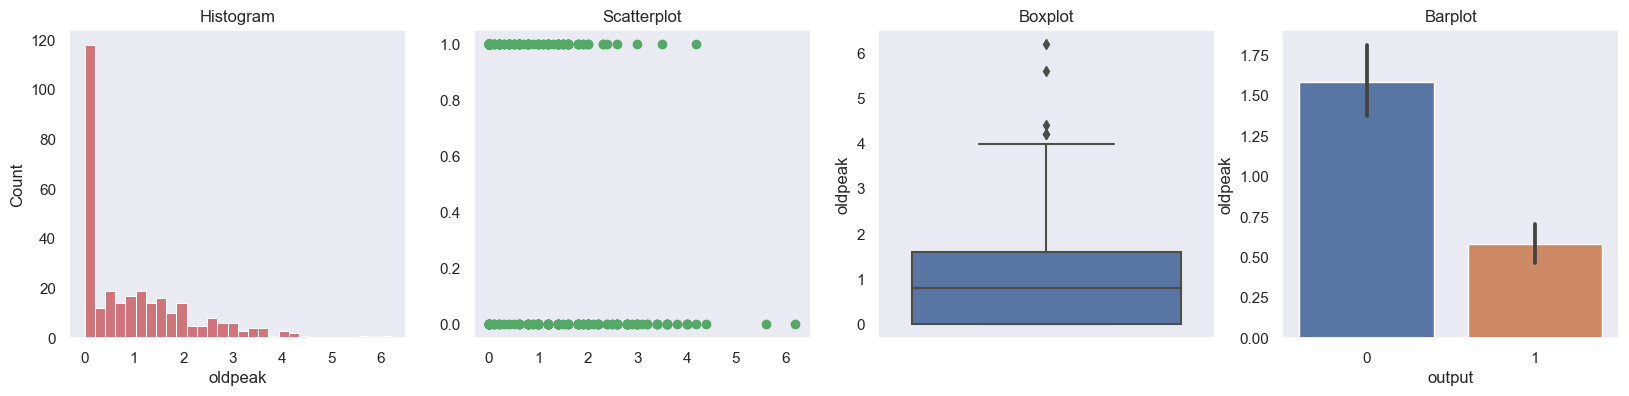

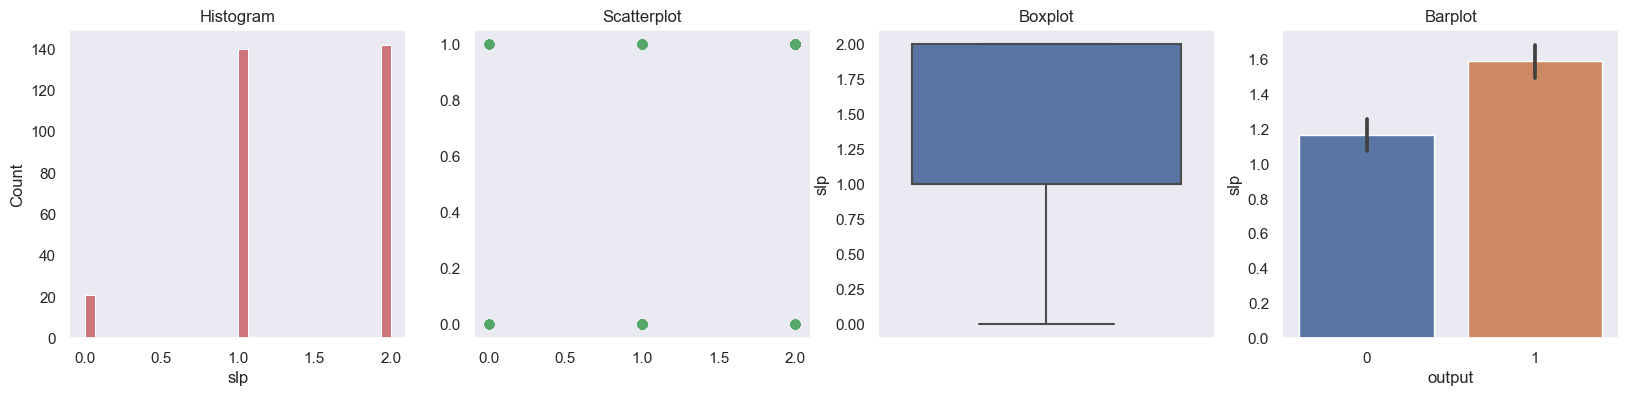

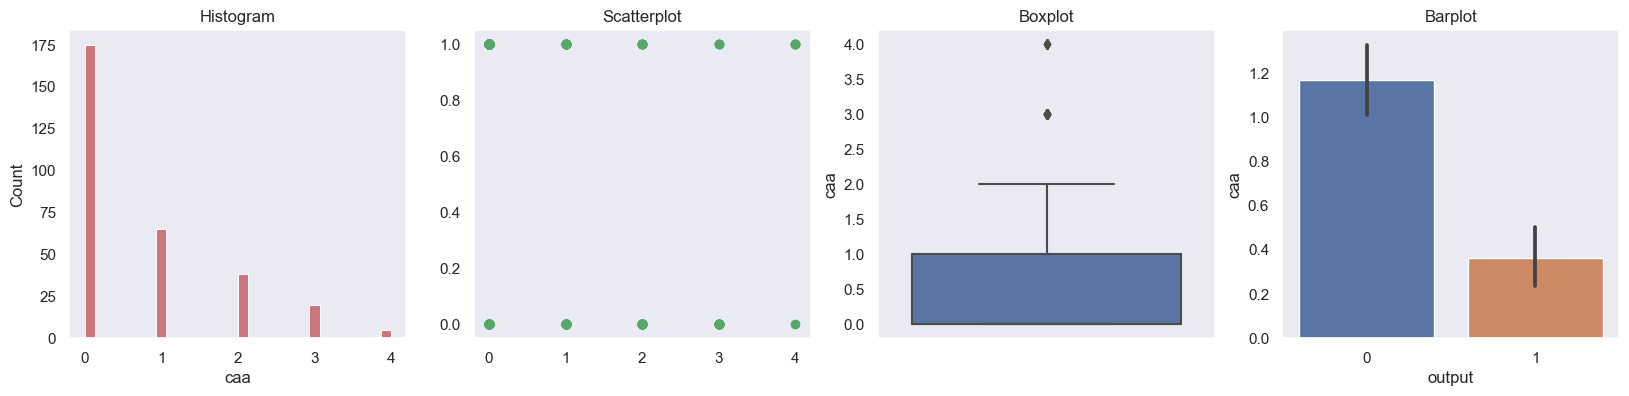

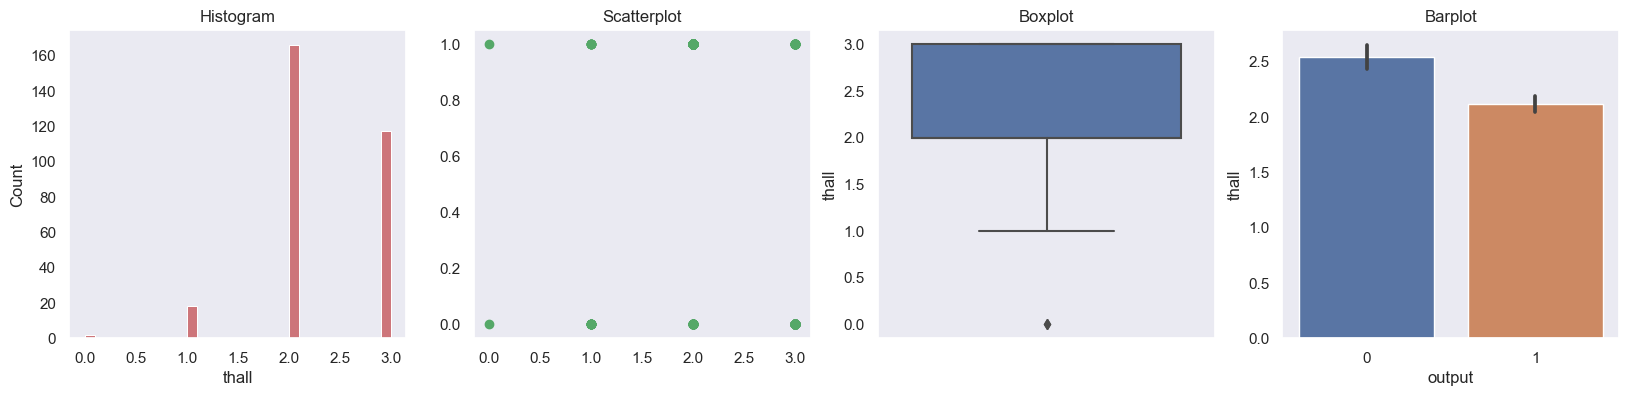

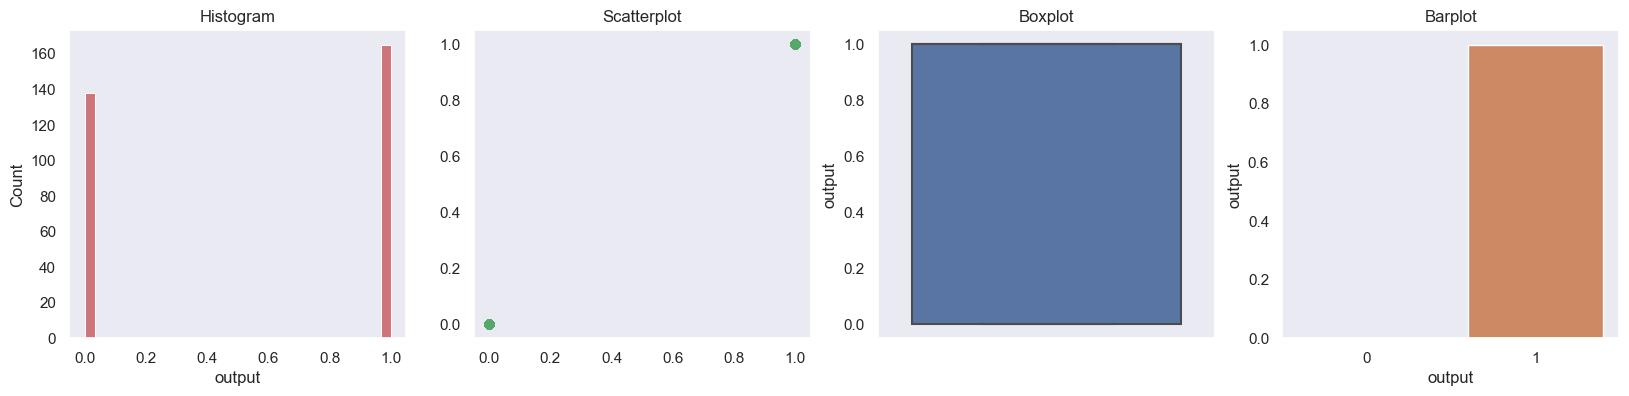

In [39]:
for variable in df:
    diagnostic_plots(df,variable,'output')

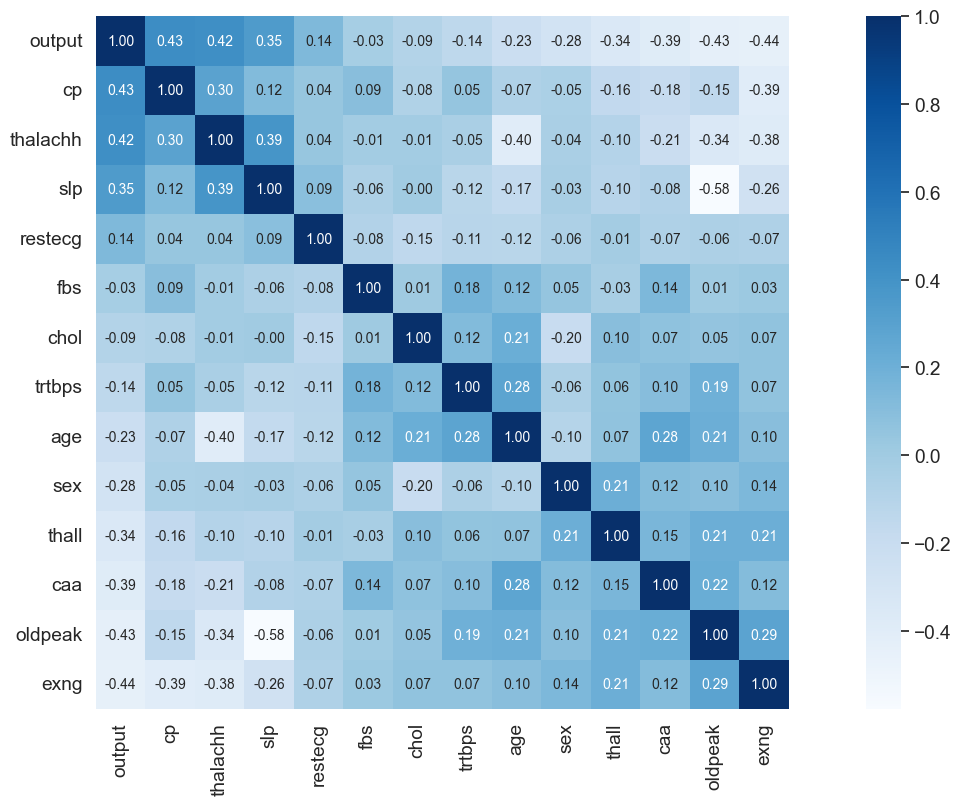

In [41]:
corr = df.corr()
plt.figure(figsize=(20, 9))
k = 18 #number of variables for heatmap
cols = corr.nlargest(k, 'output')['output'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [42]:
pdp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# خیلی خب تقریبا یه نگاه اجمالی به وضع داده ها انداختیم و حالا زمانش هست که بریم و مدلمون رو بسازیم
#توی اینجا من دو مدل لوجستیک رگرشن و نایو بیز رو میخوام پیاده کنم و دقت این دو رو با هم مقایسه کنیم.

# بزن بریییییییییییییییییییییییییییییییییییییییییییییییییم

## Logistic Regression Model :

In [188]:
df1= df.copy()
df1.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [189]:
y=df1.pop('output')
X=df1

print (y.shape)
print (X.shape)

(303,)
(303, 13)


In [190]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [191]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.3,random_state=0)

In [192]:
log=LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [193]:
kf=KFold(10)
result=cross_val_score(log,X_train,y_train,cv=kf)
print(result)
print(np.mean(result))

[0.88888889 0.88888889 0.77777778 0.77777778 0.66666667 0.77777778
 0.44444444 0.88888889 1.         0.77777778]
0.7888888888888889


In [194]:
print('coef: ',log.coef_)
print('Intercept: ', log.intercept_)

coef:  [[-0.22117529 -1.21096501  0.65228511 -0.28962963 -0.70523377 -0.09960861
  -0.0386862   0.83255086 -0.53876788 -0.93898851 -0.04143773 -0.86659125
  -0.43069047]]
Intercept:  [0.16535323]


In [195]:
y_pred=log.predict(X_test)

In [196]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))
print ('jaccard_score: ',jaccard_score(y_test,y_pred))
print ('f1_score: ',f1_score(y_test,y_pred))
print ('recall_score: ',recall_score(y_test,y_pred))
print ('precision_score: ',precision_score(y_test,y_pred))
print ('----------------------------------------------')
print ('precision_score: \n ',confusion_matrix(y_test,y_pred))


accuracy_score:  0.8215962441314554
jaccard_score:  0.7304964539007093
f1_score:  0.8442622950819673
recall_score:  0.8803418803418803
precision_score:  0.8110236220472441
----------------------------------------------
precision_score: 
  [[ 72  24]
 [ 14 103]]


بدون همسان کردن داده ها ما نتیجه زیر رو میگرفتیم :

accuracy_score:  0.8169014084507042

jaccard_score:  0.7272727272727273

f1_score:  0.8421052631578948

recall_score:  0.8888888888888888

precision_score:  0.8

----------------------------------------------

precision_score: 

[[ 70  26]

[ 13 104]]

In [66]:



# خب میبینید که مدل ما دقت کلی 81 در صد رو گرفته و 39 تا از داده های تست رو اشتباه و بقیه رو درست تشخیص داد... بریم ببینیم اوضاع با نایو بیز چطور میشه؟
#ما اینجا از توضیع گوسین نایو بیز استفاده میکنیم..

#بزن برییییییییییییییییییییییییییییییییییییییم

## Naive Bayes Model (Gaussian):

In [249]:
df2=df.copy()
y=df2.pop('output')
X=df2

print (y.shape)
print (X.shape)

(303,)
(303, 13)


In [250]:
#numcols  = ['trtbps','chol','thalachh']
#scaler = StandardScaler()

# Scale data
#df2[numcols] = scaler.fit_transform(df2[numcols])

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.1,random_state=0)

In [252]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [253]:
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [254]:
nbModel=GaussianNB()
nbModel.fit(X_train,y_train)

GaussianNB()

In [255]:
kf=KFold(5)
result=cross_val_score(nbModel,X_train,y_train,cv=kf)
print(result)
print(np.mean(result))

[0.66666667 1.         1.         0.83333333 0.83333333]
0.8666666666666666


In [256]:
y_pred=nbModel.predict(X_test)

In [257]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))
print ('jaccard_score: ',jaccard_score(y_test,y_pred))
print ('f1_score: ',f1_score(y_test,y_pred))
print ('recall_score: ',recall_score(y_test,y_pred))
print ('precision_score: ',precision_score(y_test,y_pred))
print ('----------------------------------------------')
print ('precision_score: \n ',confusion_matrix(y_test,y_pred))

accuracy_score:  0.7545787545787546
jaccard_score:  0.6473684210526316
f1_score:  0.7859424920127795
recall_score:  0.803921568627451
precision_score:  0.76875
----------------------------------------------
precision_score: 
  [[ 83  37]
 [ 30 123]]


accuracy_score:  0.7545787545787546

jaccard_score:  0.6473684210526316

f1_score:  0.7859424920127795

recall_score:  0.803921568627451

precision_score:  0.76875

----------------------------------------------

precision_score: 

[[ 83  37]

 [ 30 123]]